## Table of Content



1. **[Market Basket Analysis](#System3)**

2. **[Association rule](#System4)** 

3. **[Apriori algorithm](#System5)** 

4. **[Hybrid Recommender Systems ](#Hybrid)**

<a id="System3"> </a>
## Market Basket Analysis



<table align="left">
    <tr>
        <td width="15%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Market Basket Analysis is the process of discovering frequent item sets in large transactional database is called market basket analysis.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Example:  

***Market basket analysis might tell a retailer that customers often purchase colgate toothpaste and brush together, so putting both items on promotion at the same time would not create a significant increase in revenue, while a promotion involving just one of the items would likely drive sales of the other.***


<a id="System4"> </a>
## Assosciation Rules

<table align="left">
    <tr>
        <td width="15%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Association Rules are widely used to analyze retail basket or transaction data, and are intended to identify strong rules discovered in transaction data using measures of interestingness, based on the concept of strong rules. <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

### Assosciation rules are produced using algorithms like :

1. Apriori Algorithm

2. Eclat Algorithm

3. FP-growth Algorithm

##### There are various metrics in place to help us understand the strength of assosciation between antecedent and consequent:

1. **Support:**  

It is calculated to check how much popular a given item is. It is measured by the proportion of transactions in which an itemset appears

2. **Confidence:** 

It is calculated to check how likely if item X is purchased when item Y is purchased. This is measured by the proportion of transactions with item X, in which item Y also appears. 

3. **Lift:**  

It is calculated to measure how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is. The formula for lift is: (lift = support (X ->Y) / (support(X) * support(Y)).

4. **Levarage or Piatetsky-Snapiro**: 

It computes the difference between the observed frequency of X & Y appearing together and the frequency that we would expect if A and C are independent.

5. **Conviction**: 

It can be interpreted as the ratio of the expected frequency that X occurs without Y (that is to say, the frequency that the rule makes an incorrect prediction) if X and Y were independent divided by the observed frequency of incorrect predictions.

<a id="System5"> </a>
## Apriori Algorithm


<table align="left">
    <tr>
        <td width="15%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Apriori is an algorithm for frequent item set mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<table align="left">
    <tr>
        <td width="15%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#21618C">
                    <b>Read the Market.csv<br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
df = pd.read_csv(r"")
df.head()

,"MILK,BREAD,BISCUIT"
0,"BREAD,MILK,BISCUIT,CORNFLAKES"
1,"BREAD,TEA,BOURNVITA"
2,"JAM,MAGGI,BREAD,MILK"
3,"MAGGI,TEA,BISCUIT"
4,"BREAD,TEA,BOURNVITA"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   MILK,BREAD,BISCUIT  19 non-null     object
dtypes: object(1)
memory usage: 280.0+ bytes


In [8]:
df.shape

(19, 1)

In [9]:
df.columns.size

1

#### unique column extraction operation

In [10]:

unique_row_items = []
for index, row in df.iterrows():
    items_series = list(row.str.split(','))
    for item_serie in items_series:
        for item in item_serie:
            if item not in unique_row_items:
                unique_row_items.append(item)

unique_row_items

['BREAD',
 'MILK',
 'BISCUIT',
 'CORNFLAKES',
 'TEA',
 'BOURNVITA',
 'JAM',
 'MAGGI',
 'COFFEE',
 'COCK',
 'SUGER']

### Building Apriori Algorithm

In [11]:
df_apriori = pd.DataFrame(columns=unique_row_items)
df_apriori

,BREAD,MILK,BISCUIT,CORNFLAKES,TEA,BOURNVITA,JAM,MAGGI,COFFEE,COCK,SUGER


##### match the data in hand and convert them to onehotencoding and add to dataframe

In [12]:

for index, row in df.iterrows():
    items = str(row[0]).split(',')
    #print(items)
    one_hot_encoding = np.zeros(len(unique_row_items),dtype=int)
    for it in items:
        for i,column in enumerate(df_apriori.columns):
            #print(i,column,it)
            if it == column:
                one_hot_encoding[i] = 1
    df_apriori.at[index] = one_hot_encoding
    #print(one_hot_encoding)


In [13]:
df_apriori

,BREAD,MILK,BISCUIT,CORNFLAKES,TEA,BOURNVITA,JAM,MAGGI,COFFEE,COCK,SUGER
0,1,1,1,1,0,0,0,0,0,0,0
1,1,0,0,0,1,1,0,0,0,0,0
2,1,1,0,0,0,0,1,1,0,0,0
3,0,0,1,0,1,0,0,1,0,0,0
4,1,0,0,0,1,1,0,0,0,0,0
5,0,0,0,1,1,0,0,1,0,0,0
6,1,0,1,0,1,0,0,1,0,0,0
7,1,0,0,0,1,0,1,1,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0
9,0,0,1,1,0,0,0,0,1,1,0


In [14]:
df_apriori.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   BREAD       19 non-null     object
 1   MILK        19 non-null     object
 2   BISCUIT     19 non-null     object
 3   CORNFLAKES  19 non-null     object
 4   TEA         19 non-null     object
 5   BOURNVITA   19 non-null     object
 6   JAM         19 non-null     object
 7   MAGGI       19 non-null     object
 8   COFFEE      19 non-null     object
 9   COCK        19 non-null     object
 10  SUGER       19 non-null     object
dtypes: object(11)
memory usage: 2.4+ KB


In [15]:
df_apriori=df_apriori.astype('int')

In [16]:
freq_items = apriori(df_apriori, min_support = 0.2, use_colnames = True, verbose = 1)


Processing 72 combinations | Sampling itemset size 2
Processing 18 combinations | Sampling itemset size 3


In [17]:
freq_items

,support,itemsets
0,0.631579,(BREAD)
1,0.210526,(MILK)
2,0.315789,(BISCUIT)
3,0.315789,(CORNFLAKES)
4,0.368421,(TEA)
5,0.210526,(BOURNVITA)
6,0.263158,(MAGGI)
7,0.421053,(COFFEE)
8,0.315789,(SUGER)
9,0.210526,"(TEA, BREAD)"


In [18]:
freq_items.head()

,support,itemsets
0,0.631579,(BREAD)
1,0.210526,(MILK)
2,0.315789,(BISCUIT)
3,0.315789,(CORNFLAKES)
4,0.368421,(TEA)


### Building Assosciation Rules

In [19]:
df_association_rules = association_rules(freq_items, metric = "confidence", min_threshold = 0.2)
df_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(TEA),(BREAD),0.368421,0.631579,0.210526,0.571429,0.904762,-0.022161,0.859649
1,(BREAD),(TEA),0.631579,0.368421,0.210526,0.333333,0.904762,-0.022161,0.947368
2,(BREAD),(SUGER),0.631579,0.315789,0.210526,0.333333,1.055556,0.011080,1.026316
3,(SUGER),(BREAD),0.315789,0.631579,0.210526,0.666667,1.055556,0.011080,1.105263
4,(COFFEE),(CORNFLAKES),0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421
5,(CORNFLAKES),(COFFEE),0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842
6,(MAGGI),(TEA),0.263158,0.368421,0.210526,0.800000,2.171429,0.113573,3.157895
7,(TEA),(MAGGI),0.368421,0.263158,0.210526,0.571429,2.171429,0.113573,1.719298
8,(COFFEE),(SUGER),0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421
9,(SUGER),(COFFEE),0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842


In [20]:
df_association_rules.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(MAGGI),(TEA),0.263158,0.368421,0.210526,0.800000,2.171429,0.113573,3.157895
3,(SUGER),(BREAD),0.315789,0.631579,0.210526,0.666667,1.055556,0.011080,1.105263
5,(CORNFLAKES),(COFFEE),0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842
9,(SUGER),(COFFEE),0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842
0,(TEA),(BREAD),0.368421,0.631579,0.210526,0.571429,0.904762,-0.022161,0.859649
7,(TEA),(MAGGI),0.368421,0.263158,0.210526,0.571429,2.171429,0.113573,1.719298
4,(COFFEE),(CORNFLAKES),0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421
8,(COFFEE),(SUGER),0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421
1,(BREAD),(TEA),0.631579,0.368421,0.210526,0.333333,0.904762,-0.022161,0.947368
2,(BREAD),(SUGER),0.631579,0.315789,0.210526,0.333333,1.055556,0.011080,1.026316


In [21]:
df_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(TEA),(BREAD),0.368421,0.631579,0.210526,0.571429,0.904762,-0.022161,0.859649
1,(BREAD),(TEA),0.631579,0.368421,0.210526,0.333333,0.904762,-0.022161,0.947368
2,(BREAD),(SUGER),0.631579,0.315789,0.210526,0.333333,1.055556,0.011080,1.026316
3,(SUGER),(BREAD),0.315789,0.631579,0.210526,0.666667,1.055556,0.011080,1.105263
4,(COFFEE),(CORNFLAKES),0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421
5,(CORNFLAKES),(COFFEE),0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842
6,(MAGGI),(TEA),0.263158,0.368421,0.210526,0.800000,2.171429,0.113573,3.157895
7,(TEA),(MAGGI),0.368421,0.263158,0.210526,0.571429,2.171429,0.113573,1.719298
8,(COFFEE),(SUGER),0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421
9,(SUGER),(COFFEE),0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842


In [22]:
df_association_rules["antecedents"].apply(lambda x: str(x))

0           frozenset({'TEA'})
1         frozenset({'BREAD'})
2         frozenset({'BREAD'})
3         frozenset({'SUGER'})
4        frozenset({'COFFEE'})
5    frozenset({'CORNFLAKES'})
6         frozenset({'MAGGI'})
7           frozenset({'TEA'})
8        frozenset({'COFFEE'})
9         frozenset({'SUGER'})
Name: antecedents, dtype: object

In [23]:
cols = ['antecedents','consequents']
df_association_rules[cols] = df_association_rules[cols].applymap(lambda x: tuple(x))
print (df_association_rules)

     antecedents    consequents  antecedent support  consequent support  \
0         (TEA,)       (BREAD,)            0.368421            0.631579   
1       (BREAD,)         (TEA,)            0.631579            0.368421   
2       (BREAD,)       (SUGER,)            0.631579            0.315789   
3       (SUGER,)       (BREAD,)            0.315789            0.631579   
4      (COFFEE,)  (CORNFLAKES,)            0.421053            0.315789   
5  (CORNFLAKES,)      (COFFEE,)            0.315789            0.421053   
6       (MAGGI,)         (TEA,)            0.263158            0.368421   
7         (TEA,)       (MAGGI,)            0.368421            0.263158   
8      (COFFEE,)       (SUGER,)            0.421053            0.315789   
9       (SUGER,)      (COFFEE,)            0.315789            0.421053   

    support  confidence      lift  leverage  conviction  
0  0.210526    0.571429  0.904762 -0.022161    0.859649  
1  0.210526    0.333333  0.904762 -0.022161    0.947368  


In [24]:
df_association_rules = (df_association_rules.explode('antecedents')
         .reset_index(drop=True)
         .explode('consequents')
         .reset_index(drop=True))

In [25]:
df_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,TEA,BREAD,0.368421,0.631579,0.210526,0.571429,0.904762,-0.022161,0.859649
1,BREAD,TEA,0.631579,0.368421,0.210526,0.333333,0.904762,-0.022161,0.947368
2,BREAD,SUGER,0.631579,0.315789,0.210526,0.333333,1.055556,0.011080,1.026316
3,SUGER,BREAD,0.315789,0.631579,0.210526,0.666667,1.055556,0.011080,1.105263
4,COFFEE,CORNFLAKES,0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421
5,CORNFLAKES,COFFEE,0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842
6,MAGGI,TEA,0.263158,0.368421,0.210526,0.800000,2.171429,0.113573,3.157895
7,TEA,MAGGI,0.368421,0.263158,0.210526,0.571429,2.171429,0.113573,1.719298
8,COFFEE,SUGER,0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421
9,SUGER,COFFEE,0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842


In [26]:
df_association_rules["product_group"] = df_association_rules["antecedents"].apply(lambda x: str(x)) + "," + df_association_rules["consequents"].apply(lambda x: str(x))

In [27]:
df_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,product_group
0,TEA,BREAD,0.368421,0.631579,0.210526,0.571429,0.904762,-0.022161,0.859649,"TEA,BREAD"
1,BREAD,TEA,0.631579,0.368421,0.210526,0.333333,0.904762,-0.022161,0.947368,"BREAD,TEA"
2,BREAD,SUGER,0.631579,0.315789,0.210526,0.333333,1.055556,0.011080,1.026316,"BREAD,SUGER"
3,SUGER,BREAD,0.315789,0.631579,0.210526,0.666667,1.055556,0.011080,1.105263,"SUGER,BREAD"
4,COFFEE,CORNFLAKES,0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421,"COFFEE,CORNFLAKES"
5,CORNFLAKES,COFFEE,0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842,"CORNFLAKES,COFFEE"
6,MAGGI,TEA,0.263158,0.368421,0.210526,0.800000,2.171429,0.113573,3.157895,"MAGGI,TEA"
7,TEA,MAGGI,0.368421,0.263158,0.210526,0.571429,2.171429,0.113573,1.719298,"TEA,MAGGI"
8,COFFEE,SUGER,0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421,"COFFEE,SUGER"
9,SUGER,COFFEE,0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842,"SUGER,COFFEE"


In [28]:
df1 = df_association_rules.loc[:,["product_group","confidence","lift"]].sort_values("confidence",ascending=False)

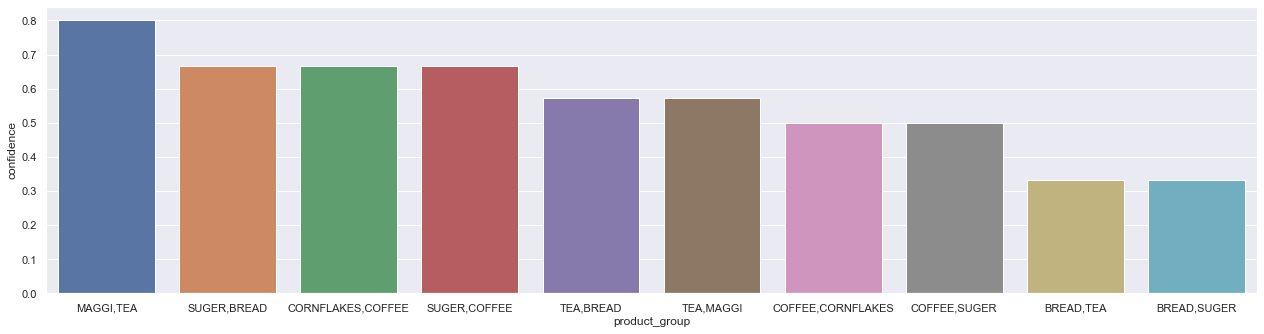

In [29]:
import seaborn as sns
sns.set(font_scale=0.4) 
sns.set(rc={'figure.figsize':(21.7,5.27)})
sns.barplot(x="product_group",y="confidence",data=df1);

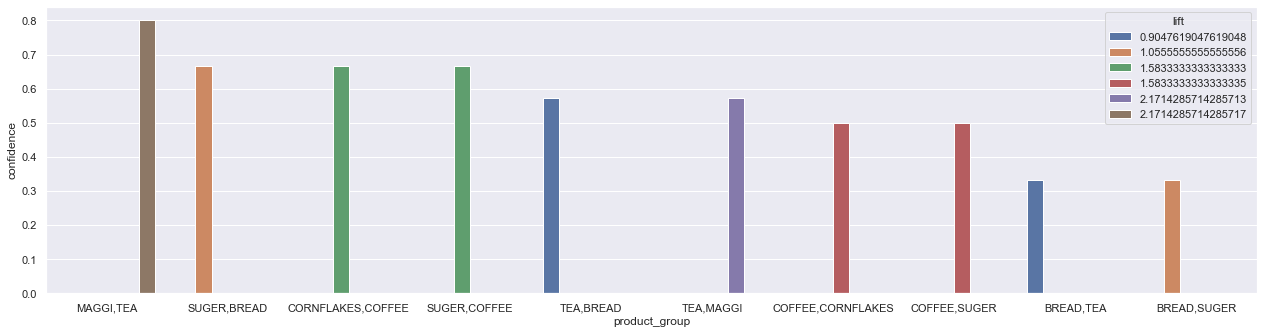

In [30]:
import seaborn as sns
sns.set(font_scale=0.4) 
sns.set(rc={'figure.figsize':(21.7,5.27)})
sns.barplot(x="product_group",y="confidence",hue="lift",data=df1);

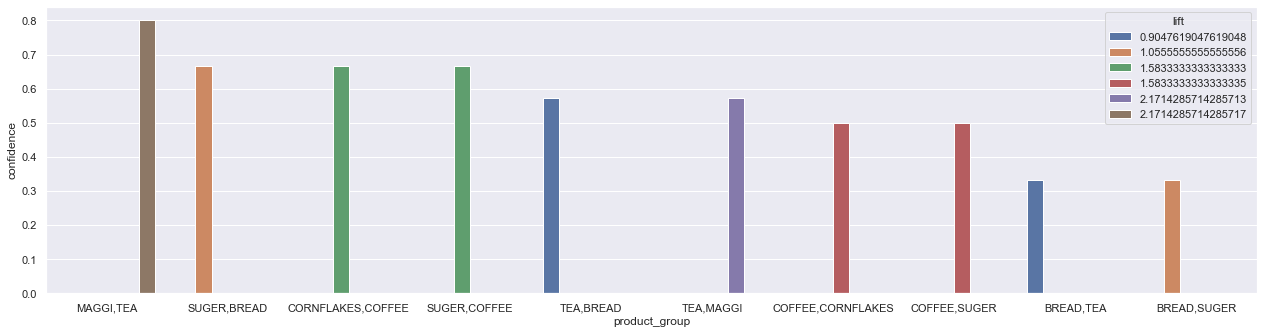

In [31]:
import seaborn as sns
sns.set(font_scale=0.4) 
sns.set(rc={'figure.figsize':(21.7,5.27)})
sns.barplot(x="product_group",y="confidence",hue="lift",data=df1);

<AxesSubplot:>

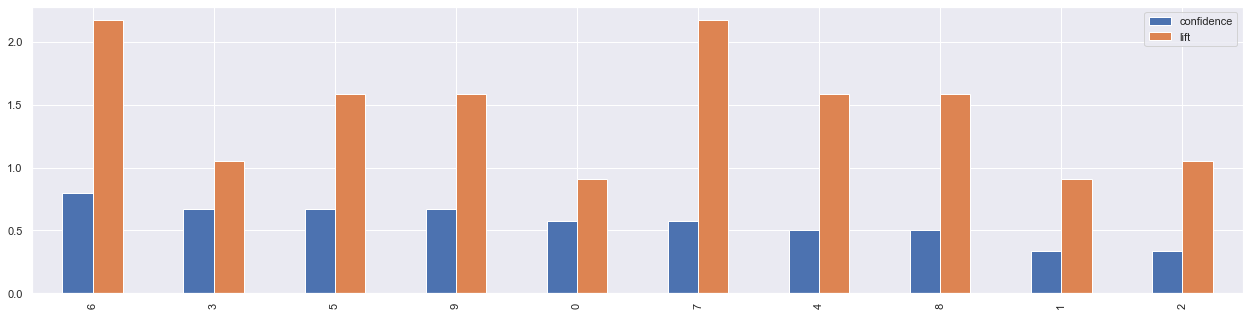

In [32]:
df1.plot.bar()

# conclusion

* 80% of customers who buy MAGGI (Instant soup) buy it in tea.

* TEA and MAGGI products increase their sales by 2.17 times mutually.

* 66% of customers who buy SUGAR buy it in bread.

* 42% of customers who buy COFFEE buy sugar and CORNFLAKES. At the same time, 33% of these sales are in bread.

<a id="Hybrid"> </a>
## Hybrid Recommender Systems 


<table align="left">
    <tr>
        <td width="15%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Hybrid recommendation filtering algorithm is mix between content based and collaborative filtering.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

##### Content Boosted Collaborative Filtering using Item Item Similarity and Supervised learning

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<table align="left">
    <tr>
        <td width="15%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#21618C">
                    <b>Read the ratings, movie.csv<br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
ratings = pd.read_csv(r'')

In [37]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [38]:
ratings.shape

(100004, 4)

In [40]:
movies = pd.read_csv(r'movies.csv')

In [41]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [42]:
movies.shape

(9125, 3)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
trainDF, tempDF = train_test_split(ratings, test_size=0.2, random_state=100)
testDF = tempDF.copy()
tempDF.rating = np.nan

C:\Users\praje\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [45]:
tempDF.head()

,userId,movieId,rating,timestamp
18935,126,95,NaN,833286594
53160,384,55282,NaN,1214773174
69828,481,61323,NaN,1437001971
31345,225,367,NaN,845565857
85744,575,1269,NaN,1012595493


In [46]:
testDF = testDF.dropna()
testDF.head()

,userId,movieId,rating,timestamp
18935,126,95,3.0,833286594
53160,384,55282,4.0,1214773174
69828,481,61323,4.0,1437001971
31345,225,367,5.0,845565857
85744,575,1269,4.0,1012595493


In [47]:
ratings = pd.concat([trainDF, tempDF]).reset_index()

In [48]:
ratings

,index,userId,movieId,rating,timestamp
0,15656,102,1717,4.0,957980283
1,63605,457,64839,4.5,1471384474
2,73657,514,880,1.0,853893138
3,95366,626,1983,4.0,974778174
4,11767,73,113573,3.0,1457597407
...,...,...,...,...,...
99999,67651,472,2344,NaN,939691768
100000,61329,450,5291,NaN,1449349694
100001,72967,509,3763,NaN,1093295712
100002,31383,226,49278,NaN,1243763896


In [49]:
ratings.head()

,index,userId,movieId,rating,timestamp
0,15656,102,1717,4.0,957980283
1,63605,457,64839,4.5,1471384474
2,73657,514,880,1.0,853893138
3,95366,626,1983,4.0,974778174
4,11767,73,113573,3.0,1457597407


In [50]:
ratings.shape

(100004, 5)

### Matrix Factorization via Singular Value Decomposition

In [51]:
# We want the format of ratings matrix to be one row per user and one column per movie. 
#we can pivot ratings_df to get that and call the new variable R_df.
R_df = ratings.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0)
R_df.tail()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
670,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
671,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_df, k = 50)

In [53]:
#diag
sigma = np.diag(sigma)

In [54]:
#I also need to add the user means back to get the predicted 5-star ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns)

In [55]:
preds_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
0,-0.122993,0.038639,0.037181,-0.003138,-0.006465,0.017602,0.039557,0.003053,0.012745,0.009584,...,-0.000184,-0.002030,0.019078,-0.001043,-0.001565,-0.008588,0.028617,0.0,0.0,-0.000367
1,0.760470,1.181292,-0.126992,0.026546,0.212633,0.146260,-0.015018,0.061514,-0.080650,2.020296,...,0.004404,0.001750,0.006564,-0.004064,-0.006096,-0.063430,0.009845,0.0,0.0,0.008807
2,0.623665,0.131240,0.009892,0.010293,0.179465,0.036324,0.036505,0.063805,-0.031090,0.001071,...,0.000846,-0.002390,0.011772,0.000766,0.001148,-0.003026,0.017658,0.0,0.0,0.001692
3,0.763973,1.041922,-0.540214,-0.009712,0.000124,-1.131016,-0.451100,-0.113280,-0.245913,1.882466,...,-0.003343,0.002289,0.048446,0.022485,0.033728,0.121327,0.072668,0.0,0.0,-0.006685
4,1.679380,1.252049,0.596602,0.027421,0.635470,0.391281,0.175542,0.024540,-0.052979,0.508043,...,0.007924,-0.003023,0.001158,-0.000388,-0.000581,0.025664,0.001737,0.0,0.0,0.015847


In [56]:
sigma

array([[ 63.25113225,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  63.82679527,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  64.22443521, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 168.74567012,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        198.81124125,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 415.58850449]])

In [57]:
# return the movies with the highest predicted rating that the specified user hasn’t already rated
#Take specific user row from matrix from predictions
def recommend_movies_simple(predictions_df, userID, movies_df, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # UserID starts at 1, not 0
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.userId == (userID)]
    #Added title and genres
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'movieId', right_on = 'movieId').
                     sort_values(['rating'], ascending=False)
                 )

    print ('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print ('Recommending the highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    # select the movie which are in user list and remove those movies from our movies list
    # Then merge with the sorted user predictions with the movieIds with left join
    # Rename the columns to 'predictions'
    recommendations = (movies_df[~movies_df['movieId'].isin(user_full['movieId'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left', left_on = 'movieId', right_on = 'movieId').
         rename(columns = {user_row_number: 'Predictions'}))
    #sort the prediction values
    recommendations = (recommendations.sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations, sorted_user_predictions, user_data, user_full

already_rated, predictions, sorted_user_predictions, user_data, user_full = recommend_movies_simple(preds_df, 2, movies, ratings, 10)

User 2 has already rated 76 movies.
Recommending the highest 10 predicted ratings movies not already rated.


In [58]:
already_rated.head()

,index,userId,movieId,rating,timestamp,title,genres
63,83,2,551,5.0,835355767,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
60,44,2,265,5.0,835355697,Like Water for Chocolate (Como agua para choco...,Drama|Fantasy|Romance
35,91,2,592,5.0,835355395,Batman (1989),Action|Crime|Thriller
48,45,2,266,5.0,835355586,Legends of the Fall (1994),Drama|Romance|War|Western
51,37,2,222,5.0,835355840,Circle of Friends (1995),Drama|Romance


In [59]:
predictions

,movieId,title,genres
299,380,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller
454,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
250,316,Stargate (1994),Action|Adventure|Sci-Fi
274,344,Ace Ventura: Pet Detective (1994),Comedy
251,318,"Shawshank Redemption, The (1994)",Crime|Drama
456,597,Pretty Woman (1990),Comedy|Romance
260,329,Star Trek: Generations (1994),Adventure|Drama|Sci-Fi
183,231,Dumb & Dumber (Dumb and Dumber) (1994),Adventure|Comedy
230,288,Natural Born Killers (1994),Action|Crime|Thriller
335,434,Cliffhanger (1993),Action|Adventure|Thriller


In [60]:
user_data

,index,userId,movieId,rating,timestamp
239,33,2,168,3.0,835355710
774,25,2,52,3.0,835356031
1319,89,2,589,5.0,835355697
5945,76,2,508,4.0,835355860
6431,70,2,468,4.0,835355790
...,...,...,...,...,...
92956,94,2,661,NaN,835356141
93772,24,2,50,NaN,835355586
94844,34,2,185,NaN,835355511
96392,93,2,616,NaN,835355932


In [61]:
user_full

,index,userId,movieId,rating,timestamp,title,genres
63,83,2,551,5.0,835355767,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
60,44,2,265,5.0,835355697,Like Water for Chocolate (Como agua para choco...,Drama|Fantasy|Romance
35,91,2,592,5.0,835355395,Batman (1989),Action|Crime|Thriller
48,45,2,266,5.0,835355586,Legends of the Fall (1994),Drama|Romance|War|Western
51,37,2,222,5.0,835355840,Circle of Friends (1995),Drama|Romance
...,...,...,...,...,...,...,...
71,94,2,661,NaN,835356141,James and the Giant Peach (1996),Adventure|Animation|Children|Fantasy|Musical
72,24,2,50,NaN,835355586,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
73,34,2,185,NaN,835355511,"Net, The (1995)",Action|Crime|Thriller
74,93,2,616,NaN,835355932,"Aristocats, The (1970)",Animation|Children


In [62]:
sorted_user_predictions

movieId
356     3.823950
590     3.687249
110     3.551277
150     3.515453
593     3.247467
          ...   
1210   -0.453330
832    -0.523953
1732   -0.535795
1213   -0.563575
858    -0.595133
Name: 1, Length: 9066, dtype: float64